# CSMODEL Case Study - Heart Disease Dataset - Group 10

In this notebook, we will be analyzing a raw dataset and performing different processes in order to obtain meaningful insights and conclusions. 

## Import

First, import the necessary libraries to perfrom data operations throughout this notebook

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import levene

plt.style.use('seaborn-darkgrid')

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Dataset Description

### Brief Description

The dataset used throughout this notebook consists of data relevant to heart disease such as key metrics that are commonly used to evaluate overall cardiac health. The information it contains dates as far back as 1988 and it essentially consolidates data from four different databases each coming from a hospital in a particular region. The geographic areas that the databases cover are Cleveland, Hungary, Switzerland, and Long Beach V. 


### Collection Process

In order to build the dataset, personal information and test results from actual patients admitted to 4 different hospitals were gathered and collated, with the patients’ names and social security numbers omitted to preserve anonymity. Due to this particular collection process, there may be some form of inherent convenience bias present in the sample as only those patients who were treated at specific hospitals were included as part of the dataset. This could also imply that any insights derived from analyzing this data might primarily be applicable only to people whose health conditions were in a severe enough state to warrant a trip to the hospital. As such, there is also the possibility that the lack of a control group could make it difficult to definitively identify causal relationships between the variables in the dataset.  


### Dataset File Structure

For this notebook, we will working on a dataset called `heart` which is provided as a `.csv` file. The file can be opened in Notepad or some other text editor to view how the data is formatted.

Each row or observation in the dataset represents one patient admitted to a hospital, while each column represents a particular variable or attribute related to each person’s heart health as well as some basic demographic information. There are a total of 1025 observations in the dataset, with 14 attributes included as part of this notebook to describe each observation.

Now, let us load the data from the `heart.csv` file using the `read_csv` function and assign the resulting dataframe to the variable `heart_df`. Then, we can use the `info` function to see a quick summary of how the data is structured.

In [ ]:
heart_df = pd.read_csv('heart.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Let us also make use of the `head` function to see what the contents of the dataframe look like.

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Variables
As previously mentioned, there are a total of 14 different columns in the heart disease dataset. The following section provides a quick overview of what each variable means, how its contents are represented, and whether it is numeric or categorical in nature:

- **`age`**: patient's age (numeric)
- **`sex`**: patient's sex (categorical: 1 - Male, 0 - female)
- **`cp`**: chest pain type (categorical: assignment of categories is unclear)
- **`trestbps`**: resting blood pressure in mm Hg on admission to the hospital (numeric)
- **`chol`**: serum cholesterol in mg/dl (numeric)
- **`fbs`**: if fasting blood sugar > 120 mg/dl (categorical: 1 - true, 0 - false) 
- **`restecg`**: resting electrocardiographic results (categorical: 0 - normal, 1 - having ST-T wave abnormality, 2 - showing probable or definite left ventricular hypertrophy by Estes’ criteria)
- **`thalach`**: maximum heart rate achieved in beats per minute (numeric)
- **`exang`**: presence of exercise induced angina (categorical: 1 - yes, 0 - no)
- **`oldpeak`**: ST depression induced by exercise relative to rest (numeric)
- **`slope`**: slope of the peak exercise ST segment (categorical: 0 - downsloping, 1 - flat, 2 - upsloping)
- **`ca`**: number of major vessels (0-3) colored by flouoroscopy (numeric)
- **`thal`**: thalassemia (categorical: 0 - normal, 1 - fixed defect, 2 - reversable defect)
- **`target`**: presence of heart disease (categorical: 1 - present, 0 - not present)

A more in-depth explanation of each variable can be found in the succeeding subsections below:

#### Age
The age variable simply describes the age of the current person at the moment their data was collected.

#### Sex
The sex variable indicates whether the current person is male, corresponding to a value of `1`, or female, corresponding to a value of `0`. 

#### Chest Pain Type (ctp)

Chest pain type or ctp is a nominal variable that indicates the kind of chest pain being experienced by the current patient. This variable has chest pain classified into 4 different types: (1) asymptomatic, (2) atypical angina, (3) non-anginal pain, and (4) typical angina. 

A classification of asymptomatic simply indicates that the patient did not report any sensation of chest pain whatsoever. 

Atypical angina  is a kind of angina that manifests as symptoms that are generally inconsistent with a classical angina diagnosis. While it is still caused by reduced blood flow and therefore oxygen supply to the heart, it can potentially include symptoms such as fainting, nausea, and weakness, among others.

Non-anginal chest pain is essentially all forms of chest pain that are not attributed to cardiac malfunction. Some possible causes of this type of chest pain include gastrointestinal, respiratory, and musculoskeletal issues.

Typical angina is a form of chest pain characterized by a reduction in blood flow reaching the heart. Patients often describe this form of chest pain as a feeling of heaviness or tightness around the chest area. 


#### Resting Blood Pressure (trestbps)

Blood pressure is a measure of the amount of force at which blood pushes against our arteries each time our heart beats. Resting blood pressure, in particular, is the amount of blood pressure, measured in mm Hg or millimeter of Mercury, that is measured when we have not exerted effort for some time. For this particular dataset, the recorded values for this variable represent the blood pressure taken from a patient upon admission to the hospital. 

Typically, two values are measured when blood pressure is taken: (1) systolic blood pressure, and (2) diastolic blood pressure. Systolic pressure is the amount of blood pressure when the heart contracts, while diastolic pressure on the other hand is the amount of blood pressure present as the heart relaxes in between beats or contractions. The values under this variable only represent the systolic blood pressure due to it being more closely tied to cardiac disease compared to diastolic blood pressure. Systolic pressure above 120 mm Hg is generally considered a potential cause for concern. 


#### Serum Cholesterol (chol)

Serum cholesterol, measured in mg/dl or milligrams per deciliter, denotes the amount of cholesterol in the bloodstream. Cholesterol is a type of lipid or fat that, when accumulated in high quantities, has the potential to cause blockages that prevent blood from flowing freely. As such, high levels of serum cholesterol represent a possible risk factor for heart disease. Normal serum cholesterol levels are those that generally fall below 200 mg/dl.

#### Fasting Blood Sugar > 120 mg/dl (fbs)

Blood sugar levels indicate the amount of glucose currently present in a person’s bloodstream. A period of fasting is often done prior to measuring blood sugar in order to obtain a more consistent and accurate value as the reading is less likely to be influenced by the fluctuations caused by a recent meal. 

This variable can either have a value of `1`, which indicates that the current patient has a fasting blood sugar level above a threshold of 120 mg/dl, or it can have a value of `0`, which indicates a fasting blood sugar level below the threshold. Exceeding the said threshold can signal a potentially increased risk for developing type 2 diabetes. 


#### Resting Electrocardiographic results (restecg)

A resting electrocardiographic (ECG) test is a diagnostic test that measures the electrical activity of the heart of a patient while at rest. It is able to observe the beating or the rhythm of the heart.

In the dataset, there are three possible values. Value `0` indicates that the results of the ECG diagnostic is within normal range. Value `1` means that there is abnormality, particularly in the ST-T wave. Value `2` means that the patient may have a left ventricular hypertrophy by Estes’ criteria.

#### Maximum Heart Rate Achieved (thalach)

The value of this attribute is the maximum heart rate recorded in beats per minute during the period of time that the data was colleccted.

#### Exercise Induced Angina (exang)

Exercise induced angina has 2 possible values. A value of `1` means the patient feels chest pain or chest angina due to exercise, while `0` means the patient does not feel any chest pain after exercise.

#### ST Depression induced by Exercise relative to Rest (oldpeak)

ST depression point induced by exercise relative to rest is a point based on how far below the baseline the ST segment dips on the ECG graph after exercising.

#### Slope of the Peak Exercise ST Segment (slope)

The slope of the peak exercise ST segment describes the general trend of the ST segment found in an ECG. A downsloping ST segment is denoted by a value of `0`, while a flat ST segment is denoted by a value of `1`, and an upsloping ST segment is denoted by a  value of `2`.

#### Number of Major Vessels (0-3) Colored by Fluoroscopy (ca)

The number of major vessels colored by fluoroscopy is one way of assessing a patient's blood flow. More vessels colored typically signals better overall blood flow. 


#### Thalassemia (thal)

Thalassemia is a type of blood disorder wherein a person is unable to produce sufficient hemoglobin to transport oxygen throughout the body.

A value of `0` means the patient is "normal", and therefore does not suffer from thalassemia. Meanwhile, a value of `1` indicates a fixed defect wherein there a lack of blood flow in certain areas of the heart that is unchanged regardless of whether the patient is at rest or not. Lastly, a value of `2` indicates defects that can appear when the patient is either at rest or not, with the patient also exhibiting abnormal but observable blood flow.


#### Target

Target simply indicates whether of not a patient suffers from heart disease. Patients without heart disease are assigned a target value of `0`, while patients with heart disease are assigned a target value of `1`.

## Data Cleaning
Before exploring and analyzing the dataset, it must first be cleaned to ensure that there are no inconsistencies that may result in any erroneous data analysis. 

Specifically, the following aspects of the dataset will be checked:
- Removing unused variables
- Checking for multiple representations in each variable
- Incorrect datatype of a variable
- Default values of a variable
- Missing data
- Duplicate data
- Inconsistent formatting of values

### Removing Unused Variables

The `drop` function is used to drop selected variables from the dataset. 

The group decided to remove the variables that was either outside the scope or could not be used in the current study. These mostly consisted of variables that contained categorical values.

In [ ]:
heart_df = heart_df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis = 1)

The variables `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, and `thal` were removed because these variables will not be used, thus was removed to better focus on the needed variables.

### Check for Multiple Representations

The `unique` function is used to check if there exists multiple representations of values per variable in the dataset.  

In [ ]:
for column in heart_df:
    print("'{}' column's unique values:\n".format(column), heart_df[column].unique())
    print("")

'age' column's unique values:
 [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

'trestbps' column's unique values:
 [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

'chol' column's unique values:
 [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 2

Based on the dataset's description of each variable, all the unique values of each variable fit its valid parameters. 

### Check for Incorrect Datatypes

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   trestbps  1025 non-null   int64  
 2   chol      1025 non-null   int64  
 3   thalach   1025 non-null   int64  
 4   oldpeak   1025 non-null   float64
 5   target    1025 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 48.2 KB


Looking at the datatypes of each variable, the corresponding datatypes are all correct based on the dataset's description.

### Check for Default Values

The `unique` function is once again used, but this time to check if there exists default of values per variable in the dataset. 

In [ ]:
for column in heart_df:
    print("'{}' column's unique values:\n".format(column), heart_df[column].unique())
    print("")

'age' column's unique values:
 [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

'trestbps' column's unique values:
 [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

'chol' column's unique values:
 [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 2

The unique values of each variable all fit the parameters of their respective variable based on the description of the dataset. Therefore it can be concluded that there is no default values present in the dataset.

### Check for Missing Data

The `isnull` function is used to check if there exists null values per variable in the dataset. 

In [ ]:
heart_df.isnull().any()

age         False
trestbps    False
chol        False
thalach     False
oldpeak     False
target      False
dtype: bool

Upon checking the dataset if there are any null values, it can be seen that all variables do not contain any null values.

### Check for Duplicate Data

The `duplicated` function is first used to check if there exists duplicated records in the dataset. 

In [ ]:
heart_df.duplicated().any()

True

Upon checking the dataset for duplicates, it is seen that there are duplicated data present in the dataset. Therefore, dropping the duplicates is required.

The `drop_duplicates` function is used to drop all duplicated records in the dataset. 

In [ ]:
heart_df = heart_df.drop_duplicates()

In [ ]:
heart_df.shape

(302, 6)

After dropping the duplicated records, the result came out that there are 723 duplicated rows and the now updated number of records is 302 records.

### Check for Inconsistent Formatting

The `unique` function is once again used, but this time to check if there exists any values in the dataset with inconsistent formatting. 

In [ ]:
for column in heart_df:
    print("'{}' column's unique values:\n".format(column), heart_df[column].unique())
    print("")

'age' column's unique values:
 [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

'trestbps' column's unique values:
 [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

'chol' column's unique values:
 [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 2

Upon checking for inconsistent formatting, it can be seen that there are no values with inconsistent formats based on the dataset's description.

## Exploratory Data Analysis

To gain a better understanding of the dataset and obtain a general overview of any potential trends among the various attributes, exploratory data analysis (EDA) is performed. This involves generating numerical summaries and visualizations in order to concisely describe the characterstics of the data and form basic assumptions that can guide the formulation of a specific research question.

One of the key variables included in the dataset is the `target` variable, which essentially indicates whether or not a patient is suffering from heart disease. Given the dataset's emphasis on features associated with a patient's cardiac condition, this variable and its corresponding relationships represents a potential point of interest that the EDA can be revolved around.

Among the 14 variables included in the dataset, 6 are numerical in nature: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`, and `ca`, however this the EDA for this notebook will only be focusing on the first 5 due to the `ca` variable only having a limited range of values. By analyzing the `target` variable in conjunction with these 5 numerical variables, we can further narrow down the scope of EDA as well as maintain some form of consistency in the data analysis strategies utilized.

With the aforementioned attributes in mind, the following EDA questions are investigated to gain insights into possible patterns associated with the presence of heart disease: 

**1)** What is the distribution of age for patients with and without heart disease?

**2)** What is the distribution of resting blood pressure for patients with and without heart disease?

**3)** What is the distribution of serum cholesterol for patients with and without heart disease?

**4)** What is the distribution of maximum heart rate achieved for patients with and without heart disease?

**4)** What is the distribution of ST depression for patients with and without heart disease?

**6)** What are the relationships between age, resting blood pressure, serum cholesterol, maximum heart rate, and ST depression with the presence of heart disease?

### Question 1: What is the age distribution for patients with and without heart disease?

In order to answer this question, we generate numerical summaries and data visualizations using the `target` and `age` variables. The `target` variable is used to group the data into patients who suffer from heart disease and patient's that don't. Meanwhile, the `age` attribute contains the values that are aggregated and analyzed.


First and foremost, we split the dataframe `heart_df` which contains the cleaned data into two separate dataframes, one for patients with heart disease and one for patients without heart disease. This is done to easily differentiate the two groups at certain points during visualization. 

To do this, we initially filter all the observations in the `heart_df` dataframe which have a `target` value of `0`, indicating a pateint **without** heart disease, and assign it to the dataframe `wo_disease_df`. Then, we filter all the observations in the `heart_df` dataframe which have a target value of `1`, indicating a patient **with** heart disease, and assign it to the dataframe `w_disease_df`. 

In [ ]:
wo_disease_df = heart_df[heart_df["target"] == 0]
w_disease_df = heart_df[heart_df["target"] == 1]

As can be observed below, `wo_disease_df` only contains rows with a target value of `0`, while `w_disease_df` only contains rows with a target value of `1`. The dataframe `wo_disease_df` has a total of 138 rows, while `w_disease_df` has a total of 164 rows.

In [ ]:
wo_disease_df

,age,trestbps,chol,thalach,oldpeak,target
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0
...,...,...,...,...,...,...
694,39,118,219,140,1.2,0
720,64,140,335,158,0.0,0
739,52,128,255,161,0.0,0
843,59,160,273,125,0.0,0


In [ ]:
w_disease_df

,age,trestbps,chol,thalach,oldpeak,target
5,58,100,248,122,1.0,1
10,71,112,149,125,1.6,1
12,34,118,210,192,0.7,1
16,51,140,308,142,1.5,1
18,50,120,244,162,1.1,1
...,...,...,...,...,...,...
691,55,135,250,161,1.4,1
708,60,120,178,96,0.0,1
719,52,108,233,147,0.1,1
723,68,120,211,115,1.5,1


#### Numerical Summaries

Now, we obtain the measures of central tendency and dispersion of the complete cleaned dataset per target value by using the `groupby` function to group the data and the `agg` function to aggregate and calculate the mean, median, and standard deviation based on the `"age"` column. 

In [ ]:
heart_df.groupby("target").agg({"age": ["mean", "median", "std"]})

age                 
             mean median       std
target                            
0       56.601449   58.0  7.962082
1       52.585366   52.0  9.511957

Based on the mean and median values displayed above, it appears that on average, the patients without heart disease tend to be older than the ones with heart disease. This could potentially suggest that younger people are at least, if not more likely than older people to be afflicted with some form of heart disease. However, keep in mind that sampling bias, among others, could be one possible factor influencing the results. 

Meanwhile, there seems to be greater variability between the ages of patients with heart disease compared to the ages of patients without heart disease. This indicates that the values for patients with heart disease may tend to be further from the mean. 



#### Data Visualization

*Boxplot*

One of the techniques we can use to visualize the distribution of `age` values among patients is a side-by-side boxplot comparing the data distribution for those without heart disease and those with heart disease.

By utilizing matplotlib's `boxplot` function, we set the variable being visualized to `"age"`, group data by `"target"`, and set the desired figure size.

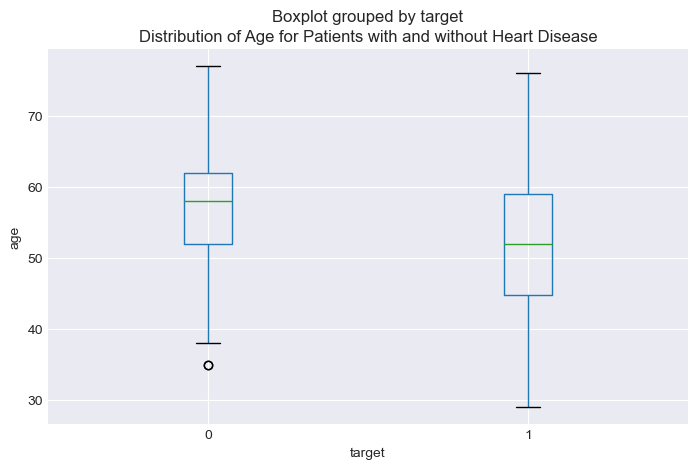

In [ ]:
heart_df.boxplot("age", by="target", figsize=(8,5))
plt.title("Distribution of Age for Patients with and without Heart Disease")
plt.xlabel("target")
plt.ylabel("age")
plt.show()

According to the boxplots displayed above, the age ranges of patients without heart disease seem to generally be higher than the age ranges for those with heart disease. This pattern is consistent throughout all values in the five-number summary, including the median, the first and third quartiles, and the lower and upper whiskers. Similar to the aformentioned numerical summaries, these boxplots denote that the patients without heart disease are generally older than those with heart disease, at least for this particular dataset. Having said that, there is still some signficiant overlap between the distribution of ages for both target values.

Between the two boxplots, both the interquartile range and overall range of age values for patients with heart disease is greater, which is consistent with its higher standard deviation, supporting the conlcusion that this group of data is more dispersed. 

Since the median of boxplot for patients with heart disease is positioned  relatively at the center of the box and the whiskers extend for similar distances, it can be said that the data for `target` value `1` is normally distributed. On the other hand, while the boxplot for patients without heart disease also somewhat resembles a normal distribution, its median is closer the third quartile of the plot.

Interestingly, only the boxplot for patients without heart disease contains a few outliers while the boxplot for patients with heart disease does not contain any.


*Histogram*

Since the `age` column consists of numerical data, a histogram can be produced to view a snapshot of the frequencies at which different age groups are present in the dataset. This also gives us a better idea of how the data is distributed as well as which parts of the distribution are particularly dense.

To generate the histogram, we utilize the `sublots` function of matplotlib as well as the `histogram` function of numpy to display the data distribution of age values for patients both without heart disease and with heart disease. Apart from that, we also make use of matplotlib's `bar` function to combine these two histograms into a single figure. The results for patients without heart disease are colored in `"blue"`, while the results for patients with heart disease are colored in `"red"`.

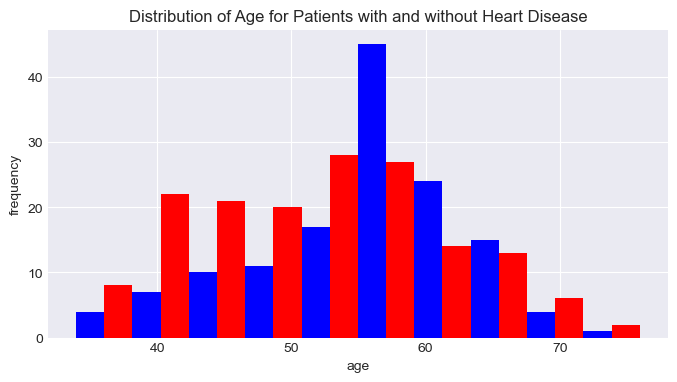

In [ ]:
f, a = plt.subplots(figsize=(8, 4))
one_h, one_b = np.histogram(wo_disease_df['age'])
two_h, two_b = np.histogram(w_disease_df['age'], bins=one_b)

width = 2.1

a.bar(one_b[:-1], one_h, width=width, facecolor="blue")
a.bar(two_b[:-1]+width, two_h, width=width, facecolor="red")

plt.title("Distribution of Age for Patients with and without Heart Disease")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

# Blue -> Without Heart Disease
# Red -> With Heart Disease

Based on the histogram above, the distribution of age for patients without heart disease appears to have a slight negative skew. This implies that there is an asymmetrical distribution and that the median may be a more accurate metric for assessing the central tendency of the data. Conversely, the age distribution for patients with heart disease seems to follow a more symmetrical distribution wherein the values for mean, median, and mode are more aligned.

At a glance, the distribution of frequencies in the graph seems to peak at the age range of about 55-60 years old for patients without heart disease and at a range of about 50-55 years old for patients with heart disease.

Comparing the two groups of patients side-by-side, the amount of people with heart disease appears to be higher for ages below 55 as well as ages approaching 70 years old and beyond. In contrast, the number of people without heart disease seems to be higher within the age range of 55-65 years old. Since the frequency of patients with heart disease is greater for both younger and older ends of the age distribution, it is somewhat difficult to determine a definite pattern in the distribution with regard to the presence of heart disease.

### Question 2: What is the distribution of resting blood pressure for patients with and without heart disease?



This second question focuses on the spread of resting blood pressure levels in relation to the presence of heart disease by utilizing the variables `target` and `trestbps`. The data is organized according to the possible `target` values, while the `trestbps` is the primary attribute being visualized. 


#### Numerical Summaries

Here, we produce numerical summaries displaying the mean, median, and standard deviation for the `trestbps` variable using the `groupby` function and the `agg` functions.


In [ ]:
heart_df.groupby("target").agg({"trestbps": ["mean", "median", "std"]})

trestbps                  
              mean median        std
target                              
0       134.398551  130.0  18.729944
1       129.250000  130.0  16.204739

Although the median resting blood pressure for patients both with and without heart disease is the same, the mean resting blood pressure for those without heart disease actually has a higher value. 

Aside from the mean, the standard deviation for patients without heart disease is also greater than that of the patients with heart disease. In other words, the data under the `target` value of `0` is more spread out. 


#### Data Visualization

*Boxplot*

To visualize the resting blood pressure distribution, we create boxplots for patients grouped according to the presence of heart disease.

With the `boxplot` function, we organize the data based on `target` and set the variable whose values are being represented by the boxplots to `"trestbps".

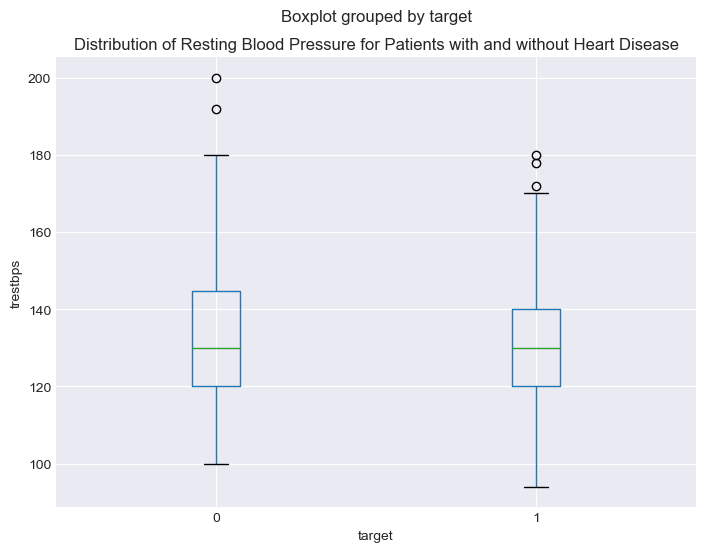

In [ ]:
heart_df.boxplot("trestbps", by="target", figsize=(8, 6))
plt.title("Distribution of Resting Blood Pressure for Patients with and without Heart Disease")
plt.xlabel("target")
plt.ylabel("trestbps")
plt.show()

By scanning the boxplots above, we can observe that the interquartile range for patients without heart disease seems to be larger than the interquartile range for patients with heart disease. This supports the idea that the serum cholesterol levels for the `target` value `0` is relatively more dispersed. 

Interestingly, the medians of the two boxplots appear to be near the same point on the y-axis, indicating quite a bit of similiarity between the two distributions, however their position relative to the rest of the boxes differ. For the data without disease, the median lies closer to the first quartile and the distance from the first quartile to the lower whisker is shorter in length compared to the distance from the third quartile to the upper whisker. These are telltale signs of a positively skewed distribution, which also means the median is typically more reliable than the mean as a measure of central tendency. In contrast, median for patients with heart disease is positioned relatively in the middle of the box, with both whiskers being of similar length. This is one of the features of normally distributed data. 

There are outliers for both boxplots. Although the boxplot for `target` equal to `1` has a greater number of outliers, its outliers seem closer to the upper whiskers compared to the outliers for `target` equal to `0`, which could be having a more pronounced effect on the overall range and distribution of the data, pulling it upward.


*Histogram*

Now, we generate histograms graphing the numerical data from the `trestbps` column to show how many patients there are at different resting blood pressure ranges. 

The `subplots`, `histogram`, and `bar` functions are used to to create the histograms grouped by `target` and place them side-by-side in a single graph.The `"blue"` portions of the figure denote the absence of heart disease, while the `"red"` sections denote the presence of heart disease. 

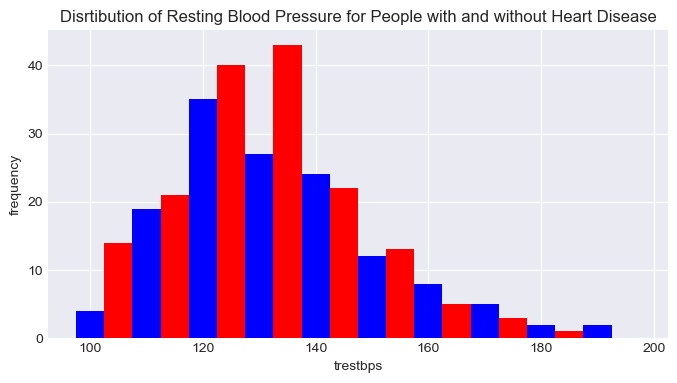

In [ ]:
f, a = plt.subplots(figsize=(8, 4))
one_h, one_b = np.histogram(wo_disease_df['trestbps'])
two_h, two_b = np.histogram(w_disease_df['trestbps'], bins=one_b)

width = 5

a.bar(one_b[:-1], one_h, width=width, facecolor="blue")
a.bar(two_b[:-1]+width, two_h, width=width, facecolor="red")

plt.title("Disrtibution of Resting Blood Pressure for People with and without Heart Disease")
plt.xlabel("trestbps")
plt.ylabel("frequency")
plt.show()

# Blue -> Without Heart Disease
# Red -> With Heart Disease

Upon examining the graph above, we can observe a slight positive skew in the distributions of patients with and without Heart disease. Thus, we typically select the median over the mean when determining central tendency in order to minimize the effects of outliers.

Judging from the resting blood pressure levels where the frequency of patients with heart disease is at its peak, it appears as though there may be an increased likelihood of heart disease when blood pressure is around the range of 130-140. Despite the frequency of patients with heart disease being generally higher for most blood pressure ranges across the entire graph, the gap between the two groups is largest around the range of 130-140 as well.

### Question 3: What is the distribution of serum cholesterol for patients with and without heart disease?

For this question, the aim is to generate and analyze how serum cholesterol levels are distributed depending on whether or not patients suffer form heart disease. The two main variables involved in fulfilling this objective are the `target` variable, which is used for grouping the data, and the `chol` variable, which is graphed in accordance with the aforementioned groups. 


#### Numerical Summaries

Let us find the mean, median, and standard deviation of the `chol` variable per `target` with the aid of the `groupby` and `agg` functions. 


In [ ]:
 heart_df.groupby("target").agg({"chol": ["mean", "median", "std"]})

chol                  
              mean median        std
target                              
0       251.086957  249.0  49.454614
1       242.640244  234.5  53.456580

As observed in the measures of central tendency located in the table above, the mean and median serum cholesterol levels seem to be greater for patients without heart disease compared to the levels for patients with heart disease. 

Furthermore, it seems patients with heart disease have a greater standard deviation value, which means the cholesterol levels for those patients tend to be more scattered. 

#### Data Visualization

*Boxplot*

Boxplots are produced to represent the five-point summary of the distribution of serum cholesterol levels per `target` value.

The `boxplot` function is a helpful tool to faciliate the actual implementation of the visual 

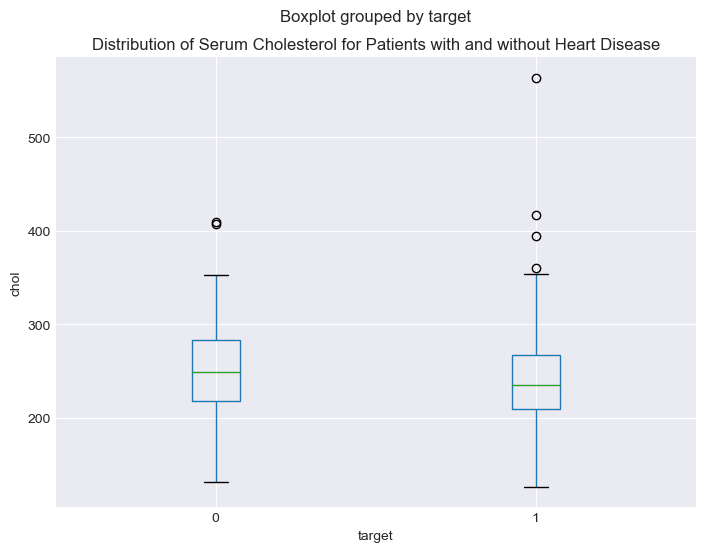

In [ ]:
heart_df.boxplot("chol", by="target", figsize=(8, 6))
plt.title("Distribution of Serum Cholesterol for Patients with and without Heart Disease")
plt.xlabel("target")
plt.ylabel("chol")
plt.show()


Upon inspection of the two boxplots presented in the graph above, an initial assumption would be that the distribution for both possible `target` values is strikingly similar. Although the medians are not exactly the same, they each still fall within the other box's interquartile range. Additionally, the interquartile and overall ranges themselves are also quite close in length, signalling a a similar level of variability among both groups of data. Again, the case is relatively the same when it comes to skewness as well, with both sets of data roughly resembling symmetrical distributions.

The area that bears the most notable difference between the two boxplots seem to be the presence of outliers, with the group of patients with heart disease having more. This may add to the uncertainty of cholesterol level's association with the `target` value. 

*Histogram*

Histograms are once again the data visualization techniques of choice to visualize the distribution of the numeric `chol` attribute. 

In order to perform these techniques conveniently, we make use functions such as `subplots`, `histogram`, and `bar` to quickly aggregate the data. The bars in `"blue"` correspond to patients without heart disease, and the bars in `"red"` correspond to patients with heart disease.


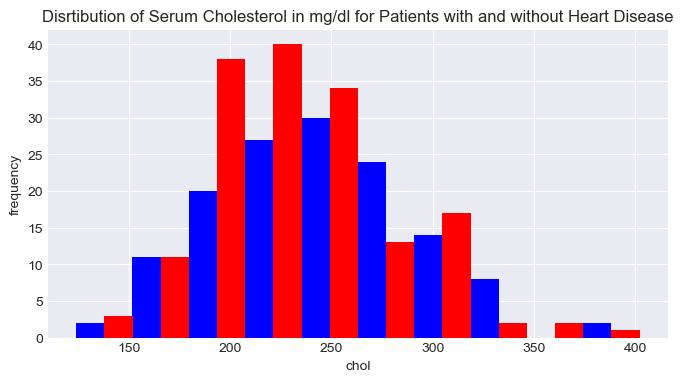

In [ ]:
f, a = plt.subplots(figsize=(8, 4))
one_h, one_b = np.histogram(wo_disease_df['chol'])
two_h, two_b = np.histogram(w_disease_df['chol'], bins=one_b)

width = 14

a.bar(one_b[:-1], one_h, width=width, facecolor="blue")
a.bar(two_b[:-1]+width, two_h, width=width, facecolor="red")

plt.title("Disrtibution of Serum Cholesterol in mg/dl for Patients with and without Heart Disease")
plt.xlabel("chol")
plt.ylabel("frequency")
plt.show()

# Blue -> Without Heart Disease
# Red -> With Heart Disease

The histogram showing the the number patients without heart disease based on cholesterol level bears a clear resemblance to a normal distribution. Although there a few outliers present in the data for patients with heart disease, the said group also somewhat fits the shape of a symmetric distribution as well. As such, both mean and median can be considered relatively reliable measures of central tendency.

By analyzing the structure of the histograms, we can see that the frequencies of patients with heart disease seem to be highest between cholesterol levels of around 200-250. At this same interval, the same group also outnumber the patients without heart disease by a noticeable margin. Outside of this range, the frequency of patients with heart disease evens out to values relatively close to the frequency of patients without heart diesase.


### Question 4: What is the distribution of maximum heart rate achieved for patients with and without heart disease?

The fourth EDA question puts an emphasis on the values for maximum heart rate in relation to the presence of heart disease. In doing so, we focus on the `target` and `thalach` variables. 

#### Numerical Summaries

To obtain the central tendency of the distribution of the maximum heart rate achieved by patients (`thalach`), we will utilize the the `groupby` and `agg` function to group and calculate the mean, median, and standard deviation. This will be divided between targets.

In [ ]:
heart_df.groupby("target").agg({"thalach": ["mean", "median", "std"]})

thalach                  
              mean median        std
target                              
0       139.101449  142.0  22.598782
1       158.378049  161.0  19.199080

After reviewing the mean and median data displayed, it would seem that patients with a higher maximum heart rate achieved are more likely to have heart disease compared to those with lesser maximum heart rate achieved. It is also good to note that the standard deviation of those with heart disease is smaller than those without, implying that the results in the dataset are more precise.

#### Data Visualization

*Boxplot*

We can also visualize the distribution of `thalach` by utilizing the `boxplot` function. We will separate the boxplot of those with `target = 1` and those with `target = 0` for better comparison.

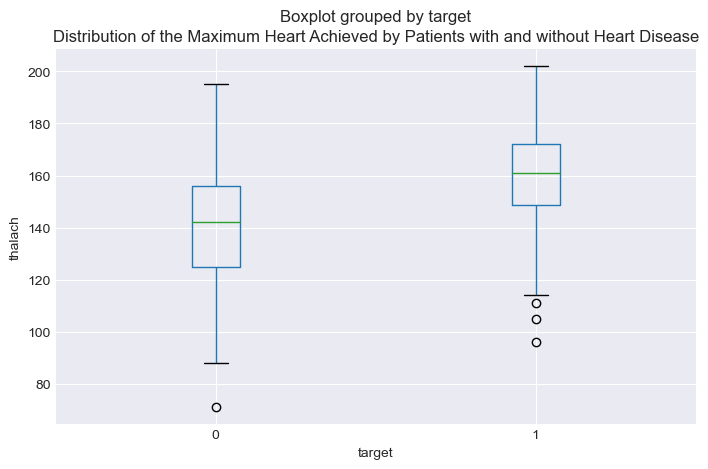

In [ ]:
heart_df.boxplot("thalach", by="target", figsize=(8,5))
plt.title("Distribution of the Maximum Heart Achieved by Patients with and without Heart Disease")
plt.xlabel("target")
plt.ylabel("thalach")
plt.show()

According to the boxplots above, the majority of patients with heart disease tend to have `thalach` values that range from around 145 to 176. It is important to note that those with heart disease have shorter whiskers, meaning that the values are closer to each other. The boxplot also shows a good number of outliers lower than the `thalach` values below 118.

Those without heart disease generally have a lower five-number summary; however, its `thalach` range is wider, meaning it encompasses more values compared to those with heart disease. It is important to note that despite having some overlap between boxplots, there is a significant non-overlapped section which may indicate that there is an association of `thalach` to `target`. We can still conclude that those with heart disease tend to have a higher five-number summary compared to those without heart disease. 

*Histogram*

We can also visualize the data of `thalach` by utilizing a histogram that can encompass decimal ranges. We will use functions such as `subplots`, `histogram` and `bar` to aggregate the data. `"blue"` corresponds to patients without heart disease, and `"red"` corresponds to patients with heart disease.

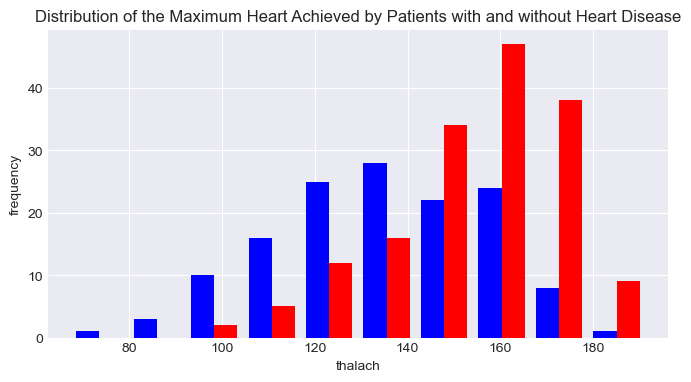

In [ ]:
f, a = plt.subplots(figsize=(8, 4))
one_h, one_b = np.histogram(wo_disease_df['thalach'])
two_h, two_b = np.histogram(w_disease_df['thalach'], bins=one_b)

width = 5

a.bar(one_b[:-1], one_h, width=width, facecolor="blue")
a.bar(two_b[:-1]+width, two_h, width=width, facecolor="red")

plt.title("Distribution of the Maximum Heart Achieved by Patients with and without Heart Disease")
plt.xlabel("thalach")
plt.ylabel("frequency")
plt.show()

# Blue -> Without Heart Disease
# Red -> With Heart Disease

Based on the histogram above, we can notice that those with heart disease is skewed negatively, which is consistent with the `mean` and `median` values obtained earlier as the `mean` 158.38 is lower than the `median` 161.00. Those with heart disease have higher maximum heart rates achieved. As observed in the histogram, it is most frequent for those with heart disease to have `thalach` values of around 160. Next to that, we have patients with heart disease having `thalach` values around 170.

Looking into patients without heart disease, their `thalach` values are generally lower with the highest frequency found around `thalach` values of 130. Comparing both types of patients, there is more evidence to conclude that `thalach` may be correlated.

### Question 5: What is the distribution of ST depression results  for people with and without heart disease?

For this question, the spotlight is on the `oldpeak` and `target` variables to explore how ST depression induced by exercise relative to rest is distributed across both patient groups.



#### Numerical Summaries

Following suit with the previous questions, we will once again utilize the `groupby` and `agg` function to find the central tendency of the ST depression (`oldpeak`) and calculate the `mean`, `median`, and `standard deviation`. This will be seperated to 2 rows based on the target value.

In [ ]:
heart_df.groupby("target").agg({"oldpeak": ["mean", "median", "std"]})

oldpeak                 
            mean median       std
target                           
0       1.585507    1.4  1.300340
1       0.586585    0.2  0.781734

Based on the produced chart, we can see that for those without heart disease, the mean, median, and standard deviation of their `ST depression` values are 1.59, 1.4, and 1.3 respectively. Those with heart disease produced the mean, median, and standard deviation of 0.59, 0.2 and 0.78 respectively.

Comparing both sets of values, patients without heart disease have higher values in `oldpeak`, possibly indicating that having higher `oldpeak` decreases the likelihood for one to receive heart disease. However is it important to note that the standard deviation of those without heart disease is wider than those with, decreasing the reliability of this assumption. The mean and median of those with heart disease is consistently lower to those without heart disease with the data less spread out as evidenced by the standard deviation.

#### Data Visualization

*Boxplot*

To further investigate, we can utilize a bloxplot to visualize the five-number summary of `oldpeak` of patients with and without heart disease.

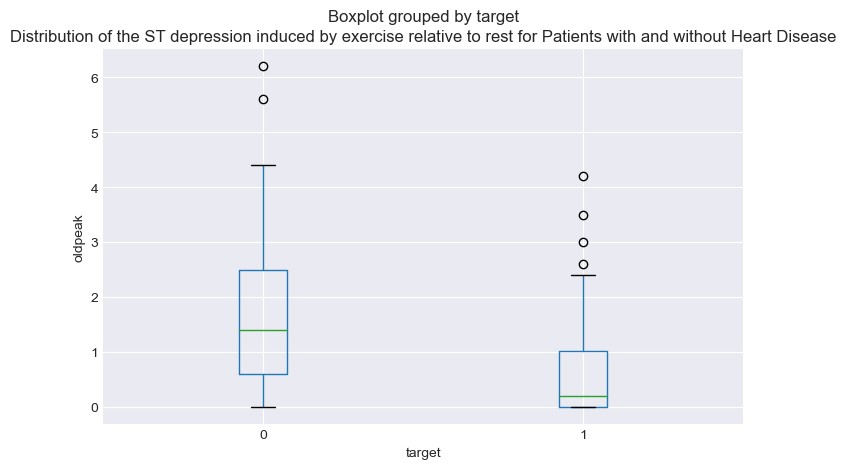

In [ ]:
heart_df.boxplot("oldpeak", by="target", figsize=(8,5))
plt.title("Distribution of the ST depression induced by exercise relative to rest for Patients with and without Heart Disease")
plt.xlabel("target")
plt.ylabel("oldpeak")
plt.show()

According to the boxplots displayed above, we can instantly identify that both boxplots contain a good number of outliers that can affect the means of `oldpeak` in patients with and without heart disease. This could either mean that there are special cases of `oldpeak` in regards to heart disease, or there may be errors committed while collecting this data.

With the visualization, we can estimate that those without heart disease tend to have `oldpeak` values between 0.5 and 2.5 while those with heart disease have values between 0 and 1.1. Based on the chart, those with higher ST depression have a higher likelihood on not having heart disease. It is important to note that there is some overlap between boxplots which means that the previous statement is not completely definite. An exception of `oldpeak` values estimated between 0.5 and 1.1 can have varying values of having a heart disease or not having a heart disease. 

*Histogram*

We can also visualize the data of `oldpeak` by utilizing a Histogram that can help us see the frequency of `oldpeak` values. We will use functions such as `subplots`, `histogram` and `bar` to aggregate the data. The portions of the graph in `"blue"` correspond to patients without heart disease, and the portions in `"red"` correspond to patients with heart disease.

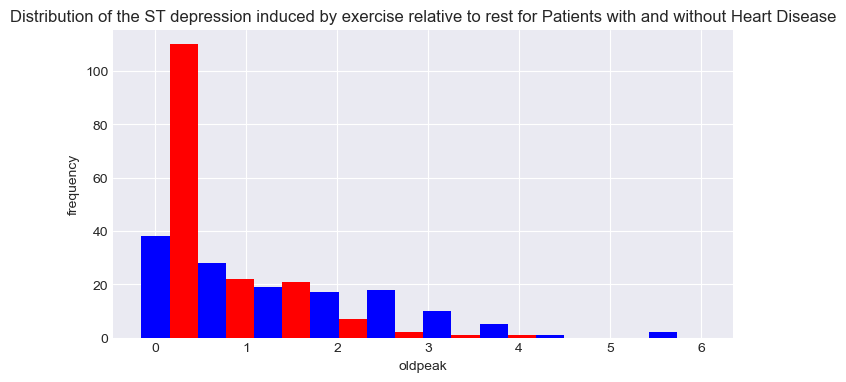

In [ ]:
f, a = plt.subplots(figsize=(8, 4))
one_h, one_b = np.histogram(wo_disease_df['oldpeak'])
two_h, two_b = np.histogram(w_disease_df['oldpeak'], bins=one_b)

width = 0.31

a.bar(one_b[:-1], one_h, width=width, facecolor="blue")
a.bar(two_b[:-1]+width, two_h, width=width, facecolor="red")

plt.title("Distribution of the ST depression induced by exercise relative to rest for Patients with and without Heart Disease")
plt.xlabel("oldpeak")
plt.ylabel("frequency")
plt.show()

# Blue -> Without Heart Disease
# Red -> With Heart Disease

The histogram better visualizes the distribution of `oldpeak` values and we can see that the frequency of both with and without heart disease is positively skewed with most occurrences in the data set having `oldpeak` values between 0 and 1. The most apparent frequency of patients with heart disease can be seen between `oldpeak` values of 0 and 1 with the highest frequency of over 100. On the other hand, the most apparent frequency of patients without heart disease can be seen near `oldpeak` values of 0. Both patient groups seem to have rising frequencies as they approach the `oldpeak` value of 0. 

There seems to be some peculiarity in estimated `oldpeak` values between 0.2 and 0.5 that signifies if a patient has heart disease as there is a large spike in the graph for patients that do suffer from heart disease. The correlation of ST depression to the presence of heart disease will be further discussed in `Question 6`.

### Question 6:  What are the relationships between age, resting blood pressure, serum cholesterol, maximum heart rate, and ST depression with the presence of heart disease?

To find the general relationship between variables `age`, `trestbps`, `chol`, `thalach`, `oldpeak` to the variable `target`, we will need to compute the correlation values. 

#### Numerical Summaries

We can find the correlation values by utilizing the `.corr()` function provided by the pandas library.

In [ ]:
# For the Correlation Values
corr = heart_df.corr()
corr

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
target,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


In the table above, we can see the correlation values between each pair of variables we included in EDA. These values range from representing negative relationships to positive ones. Notably, none of the values are above 0.5 or below -0.5, with the exception of each variable's correlation to itself.

#### Data Visualizations 
 
 After having computed the correlation values, we can visualize these with seaborn to provide a correlation heatmap for easier analysis. This can be accomplished with a combination of the `sublots`, `triu`, `diverging_palette`, and `heatmap` functions. 

<AxesSubplot:>

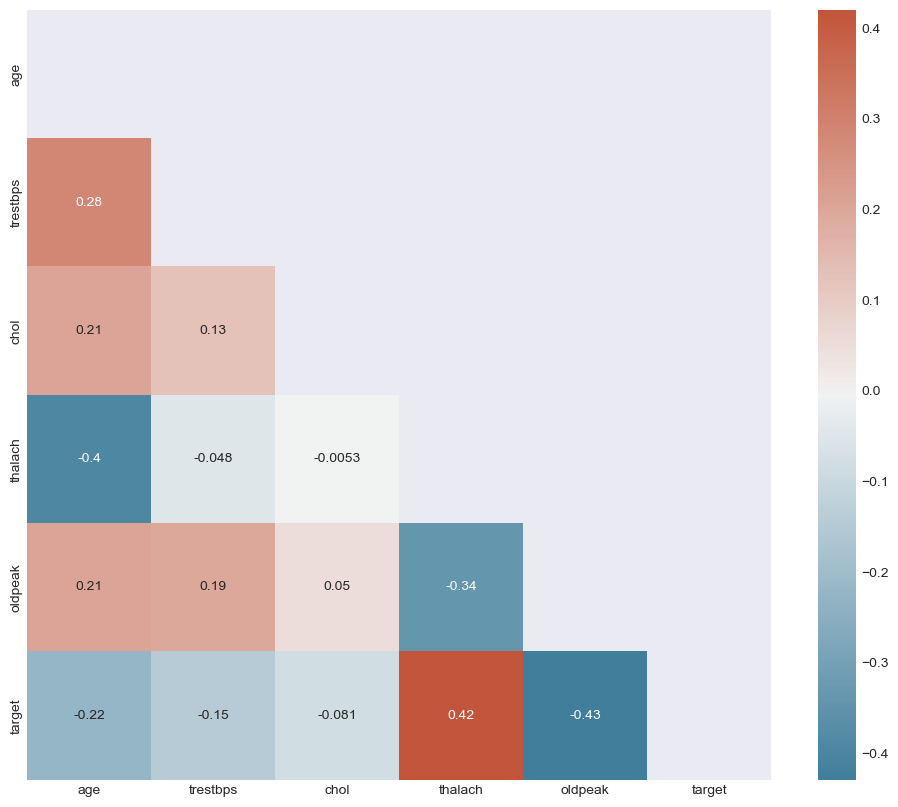

In [ ]:
# For the Heatmap Design 'seaborn-darkgrid'
f, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr, annot=True, cmap=cmap, mask=mask)

The correlation heatmap above effectively illustrates the relationship between variables. For our purposes, we will be focusing on the relationship of `target` to 5 of the other variables. Our focus will be on the bottom row of the correlation heatmap.

The correlation value of `age` to `target` is calculated to be at -0.22, which signifies a weak negative association between the variables. This could mean that age does not have much say in whether a person is classified as having heart disease.

The correlation value of `trestbps` to `target` is calculated to be at -0.15, which signifies a very weak negative association between the variables. This could mean that the resting blood pressure of a patient may not be a very significant factor in determining the presence o fheart disease.

The correlation value of `chol` to `target` is calculated to be at -0.0812, which signifies a very weak negative association between the variables. This could mean that the serum cholesterol levels of a person is not a primary factor that one should investigate when classifying whether a patient has heart disease.

The correlation value of `thalach` to `target` is calculated to be at 0.42, which signifies a moderate positive association between the variables. This could mean that the maximum heart rate achieved may be directly related to having heart disease. 

Lastly, the correlation value of `oldpeak` to `target` is calculated to be at -0.43, which signifies a moderate negative association between the variables. This could mean that ST Depression values may be inversely related to having heart disease.

To conclude the correlation heatmaps, we can see that `age`, `trestbps` and `chol` each have very weak relationship with `target`; however, `thalach` and `oldpeak` have shown to have a moderate relationship with `target`.

It has been noted that higher maximum heart rate achieved possibly increases the likelihood for a person to have heart disease, while lower ST Depression is also found to possibly increase the likelihood for a person to have heart disease.

If one were to continue researching on heart disease in a patient, maximum heart rate achieved and ST depression are potential factors that one can look into when diagnosing someone with heart disease.

## Research Question

To recall, the exploratory data analysis questions included in this notebook were predominantly geared towards describing certain variables in the dataset in relation to the `target` variable which indicates the presence of heart disease. By doing so, we sought to pinpoint specific factors that seemed to display a visible distinction between patients with heart disease and patients without heart disease. By choosing to primarily focus on numerical values, we were able to compare measures of central tendency between both groups of patients to see if average values leaned one way or the other. Likewise, it also allowed us to visualize how the values were spread out so that we could identify the degree of similarity in the range of values for each patient group as well as determine if values had a tendency to peak or to drop at certain intervals.

After investigating the characteristics of the dataset and answering the series of exploratory data analysis questions, the following research question was formulated:

------------------------------------------------------------------------------------------------------------------------------
### Can we cluster and determine whether a patient is suffering from heart disease based on the following variables: (1) maximum heart rate achieved, and (2) ST depression induced by exercise relative to rest?
--------------------------------------------------------------------------------------------------------------------------------

### Rationale for Research Question based on Exploratory Data Analysis
Given that the `target` variable divides the observations of the dataset into patients with and without heart disease, there is potential for these two groups to be translated as a pre-defined set of two clusters into which each observation can be classified. Additionally, the numerical variables that were explored could also be interpreted as dimensions or axes used to represent each observation as a data point. This allows us to somewhat concretize the concept of 'distance' between each patient based on selected variables or features from the dataset. 

Although there were initially a total of 5 variables being examined with respect to the presence of heart disease, the results of exploratory data analysis suggest that it would be more suitable to only make use of 2 of the said variables as features for clustering. The reason for this is twofold. First, including all 5 variables as features for clustering could produce a case of overfitting as the clustering algorithm could end up being too specific to the dataset. Second, only 2 out of the 5 variables displayed seemed to have a sufficiently evident difference between the distribution of values for each individual patient group to be reliably distinguished. 

The 2 features included in the research question were `thalach` and `oldpeak` because these were the variables whose distributions for each patient group exhibited the most consistent and apparent pattern. In EDA questions 4 and 5, we see from the side-by-side boxplots that although there is some overlap between the interquartile ranges of each patient group, the median for target value `1` falls clearly outside of the interquartile range of target value `0` and vice versa. This, coupled with the values in the numerical summary, support the notion that the values for `thalach` and `oldpeak` have a notable difference in their central tendencies per patient group. Furthermore, the histogram in EDA question 4 shows that upon reaching an approximate threshold of around 140 beats per minute, the frequency of patients with heart disease rises sharply as the frequency of patients without heart disease declines. At the same time, the histogram from EDA question 5 shows that the frequency of patients with heart disease consistently rises as the value of ST depression point value lowers, with the number rising sharply as the value of `oldpeak` approaches an approximate threshold of 0.5 and below. To further support these observations, the heatmap from EDA question 6 displays that `thalach` and `oldpeak` are the 2 variables among the 5 numeric variables analyzed that have the strongest correlation with the `target` variable. The `thalach` variable is shown to be positively correlated with `target` at a correlation value of 0.42, while the `oldpeak` variable is negatively correlated with `target` at a correlation vlaue of -0.43. 

In contrast, the remaining 3 numeric variables, which are `age`, `trestbps`, and `chol`, contained values that appeared to be spread out across both groups, with patterns not as easily discernible as that of the 2 selected features. Although their numerical summaries do indicate some level of difference in central tendency, their visualizations exhibited quite a bit of similarity in their range of values per patient group. In EDA question 1, despite the boxplots exhibiting some distance between the medians of each `target` value with respect to `age`, the overall range for patients with heart disease appears to extend towards both the lower and upper ends of the graph. This made it difficult to establish a clear distinction between the ranges of values. As for EDA questions 2 and 3 which examine the `trestbps` and `chol` variables respectively, the side-by-size boxplots indicate the medians for both patient groups are quite close and both their interquartile and overall ranges are of similar size and position. This implies that there could be too much overlap between the values for clustering using these features to be successful. As for the histograms for EDA questions 1, 2, and 3, the values for both patient groups seemed to be distributed in a relatively comparable fashion, with neither individual group having a notable enough trend to warrant inclusion as a feature for clustering. In line with that, EDA question 6 also expresses the weakness of the 3 attributes' relationship with `target`, citing correlation values only ranging from -0.22 to -0.081. 

Based on these insights, it seems sufficiently plausible to infer that among the 5 numeric variables included in EDA, `thalach` and `oldpeak` have the greatest potential to yield accurate results when used as features for clustering patients into those with heart diease and those without it. 

### Significance of Research Question

Probing and answering this research question has the potential to produce insights that could considerably aid in the expedient diagnosis and classification of patients that come in for cardiac testing. Identifying key factors that could determine the presence of heart disease can help minimize the consumption of critical resources such as time, money, and manpower that are often limited enough as it is. By prioritizing what kinds of tests to conduct based on these factors, healthcare practictioners may be able to diagnose and therefore treat patients more quickly, which in some instances could prove to be life-saving. Doing so may also lessen the financial burden of medical treatment on patients and their families due to reducing the number of tests that that they would end up paying for. Furthermore, by being aware of which variables or factors have the most bearing on the presence of heart disease, other confusing and less relevant data can be systematically eliminated or at least given less weight in a healthcare practioner's decision-making process. This could help prevent cases of clouded judgment and misdiagnosis. Apart from potentially benefitting healthcare and the community in general, from a research perspective, answering this question could also allow for further improvements in clustering algorithms related to heart disease and help pave the way for more advanced and accurate strategies and techniques. 

## Statistical Inference

In order to begin answering the research question posed in this notebook, we perform statistical inference through hypothesis testing. The specific type of statistical inference to be used is inference for means. This allows us to determine whether the two features proposed for clustering have a statistically significant difference in their average values that warrants their use as key factors by which the two patient groups can be adequately distinguished and clustered.

It should be noted that all of the statistical tests done within this section assume a singificance level of `5%` and thus have a corresponding alpha value of `0.05`.

### Hypotheses

First, we define two sets of hypotheses, one for each variable under investigation. The first set of hypotheses focuses on the `thalach` variable or the maximum heart rate achieved by a patient. The null hypothesis states that there is no difference in the average `thalach` value between patients with heart disease and those without it, while the alternative hypothesis argues that a difference does exist. Conversely, the second set of hypotheses places emphasis on the ST depression or `oldpeak` value recorded for each observation. The null hypothesis claims that no difference exists in the average `oldpeak` value between each patient group, with the corresponding alternative hypothesis arguing otherwise. With these two sets of hypotheses as our guide, we can then utilize the appropriate hypothesis testing techniques to validate them and ascertain which hold true based on the given dataset. 

#### Maximum Heart Rate Achieved (thalach)

***$H_0$:*** *There is no difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease.*

***$H_A$:*** *There is a difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease.*

####  ST depression induced by exercise relative to rest (oldpeak)

***$H_0$:*** *There is no difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease.*

***$H_A$:*** *There is a difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease.*

### Data Preprocessing

Before any actual hypothesis testing can be executed, we must first preprocess the relevant data to decide which tests are most suitable for the context of the research question as well as assess whether the data must undergo any additional changes or transformations before meeting the conditions for these tests to be satisfactorily conducted. 

We begin by further narrowing down the scope of the dataset by only selecting the variables relevant to the research question. To do this, the columns `thalach`, `oldpeak`, and `target` will be the only ones retained in the `heart_df` dataframe as done in the code below where the list of column names is used to filter the original dataframe.

In [ ]:
heart_df = heart_df[["thalach", "oldpeak", "target"]]
heart_df

,thalach,oldpeak,target
0,168,1.0,0
1,155,3.1,0
2,125,2.6,0
3,161,0.0,0
4,106,1.9,0
...,...,...,...
723,115,1.5,1
733,175,0.6,1
739,161,0.0,0
843,125,0.0,0


#### Maximum Heart Rate Achieved (thalach)

One critical component of deciding on which hypothesis testing technique to use would be to check whether the distribution of data follows a normal distribution. To do this, we can make use of a Q-Q plot which allows us to visualize the distirbution of data vis-à-vis a line that represents a normal distribution. Essentially, the closer the data points are to the line, the more likely the values can be said to be normally distributed. 

In order to graph the Q-Q plot, we first separate the `heart_df` dataframe into the `wo_disease_df` dataframe which stores all the patients without disease, and the `w_disease_df` dataframe which stores all the patients with disease. Then, we store only the `thalach` column in each dataframe and assign them to `thalach_wo_disease` and `thalach_w_disease`, which contain the `thalach` values of patients without heart disease and with heart disease, respectively. Then, we use the `figure`, `add_subplot`, and `qqplot` functions in order to generate the graphs. 

Text(0.5, 1.0, 'Distribution of thalach Patients with Heart Disease')

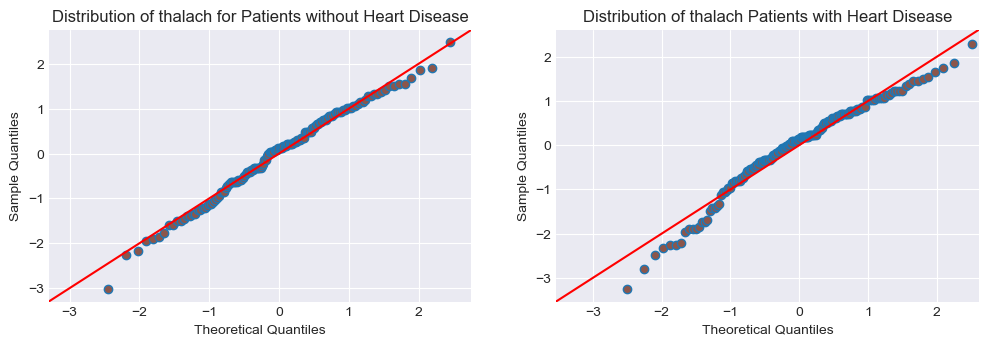

In [ ]:
# separate observations into those with and without heart disease
wo_disease_df = heart_df[heart_df["target"] == 0]
w_disease_df = heart_df[heart_df["target"] == 1]

# obtain only the thalach values of each observation
thalach_wo_disease = wo_disease_df["thalach"]
thalach_w_disease = w_disease_df["thalach"]

# create the Q-Q plot for the thalach distribution of patients without heart disease
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(thalach_wo_disease, line='45', fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of thalach for Patients without Heart Disease')

# create the Q-Q plot for the thalach distribution of patients with heart disease
ax = fig.add_subplot(3, 2, 2)
sm.qqplot(thalach_w_disease,line='45',fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of thalach Patients with Heart Disease')

Upon analyzing the two Q-Q plots above, we can observe that the distribution of thalach data for patients without heart disease is close enough to the red line to likely be a Gaussian distribution. However, the Q-Q plot on the right for patients with heart disease has several data points that deviate from the line to a sufficient extent that makes it plausible to assume that the data is not normally distributed.

To support the conclusions drawn from the graphs, we can use what is called the Shapiro-Wilk test to compute for the p-value that more accurately determines whether each group of data is normally distributed. The Shapiro-Wilk test's null hypothesis states that the distribution follows a normal distribution, while it's alternative hypothesis states that the data is not normally distributed. The `shapiro` function from the scipy library would be appropriate for this use case.

Here, we obtain the result for the thalach values of patients without heart disease.

In [ ]:
shapiro(thalach_wo_disease)

ShapiroResult(statistic=0.9899677634239197, pvalue=0.4253266751766205)

Given a p-value of around `0.43` which is well above the alpha value of `0.05`, it seems there is strong evidence that the thalach data for patients without heart disease is indeed normally distributed.

Then, we perform the same test on the data of patients with heart disease.

In [ ]:
shapiro(thalach_w_disease)

ShapiroResult(statistic=0.9665896892547607, pvalue=0.0005433517508208752)

The resulting p-value of approximately `0.0005`, which is below the the alpha value of `0.05` supports the Shapiro-Wilk test's alternative hypothesis and indicates a non-normal distribution

Apart from the Shapiro-Wilk test, we also utilize Levene's test for equality of variance to determine whether the variance of the two patient groups is relatively equal. 

In [ ]:
levene(thalach_wo_disease, thalach_w_disease)

LeveneResult(statistic=5.166053935690524, pvalue=0.02373955518706978)

The Levene's test resulted in a p-value of around `0.02`, which shows unequal variance in the two groups.

Although the distribution of `thalach` for patients with heart disease is not normally distributed, we can still attempt to transform the data to make it more closely resemble a normal distribution. One way to achieve this is by applying a Box-Cox Transformation. The scipy library has a built-in `boxcox` function that allows us to perform this transformation on the `thalach` column of our dataset.

In the code block below, we create a copy of the `heart_df` dataframe and assign it to `heart_df_norm`. Then, we use the `boxcox` function to perform the Box-Cox Transformation on the `thalach` column of the `heart_df_norm` dataframe, and assign the transformed data back to the same column and dataframe. 

In [ ]:
heart_df_norm = heart_df.copy()
heart_df_norm["thalach"], fitted_lambda = stats.boxcox(heart_df_norm["thalach"])
print(heart_df_norm)

          thalach  oldpeak  target
0    40325.805344      1.0       0
1    33707.716121      3.1       0
2    20882.797515      2.6       0
3    36681.102512      0.0       0
4    14468.006863      1.9       0
..            ...      ...     ...
723  17345.469663      1.5       1
733  44161.517660      0.6       1
739  36681.102512      0.0       0
843  20882.797515      0.0       0
878  16681.167180      1.4       0

[302 rows x 3 columns]


As shown in the contents of the `heart_df_norm` dataframe above, the range of values of the `thalach` column has considerably increased as a result of the Box-Cox transformation.

With the newly transformed data, we can then generate a Q-Q plot once again to verify if the distribution of `thalach` for both patient groups now follows a Gaussian distribution. 

In the code block below, the `heart_df_norm` dataframe is separated into the `wo_disease_df_norm` dataframe for all patients without heart disease and the `w_disease_df_norm` dataframe for all patients with heart disease. After doing so, only the `thalach` column in each dataframe is filtered and assigned to `thalach_wo_disease_norm` for patients without heart disease and to `thalach_w_disease_norm` for patients with heart disease. These two sets of values can then be used in conjunction with the `figure`, `add_suplot`, and `qqplot` functions to produce the actual Q-Q plots. 

Text(0.5, 1.0, 'Distribution of thalach for Patients with Heart Disease')

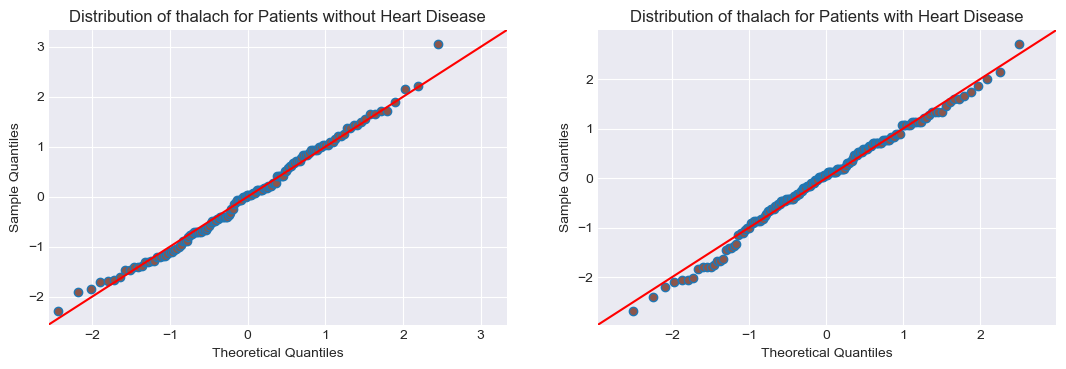

In [ ]:
# separate observations into those with and without heart disease
wo_disease_df_norm = heart_df_norm[heart_df_norm["target"] == 0]
w_disease_df_norm = heart_df_norm[heart_df_norm["target"] == 1]

# obtain only the thalach values of each observation
thalach_wo_disease_norm = wo_disease_df_norm["thalach"]
thalach_w_disease_norm = w_disease_df_norm["thalach"]

# create the Q-Q plot for the thalach distribution of patients without heart disease
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(thalach_wo_disease_norm, line='45', fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of thalach for Patients without Heart Disease')

# create the Q-Q plot for the thalach distribution of patients with heart disease
ax = fig.add_subplot(3, 2, 2)
sm.qqplot(thalach_w_disease_norm,line='45',fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of thalach for Patients with Heart Disease')

Looking at the two Q-Q plots above, we can deduce that the distribution of `thalach` now seems normally distributed for both patient groups

To further verify this assumption, we turn to Shapiro-Wilk test once again. First we apply the test on the `thalach` values of patients without heart disease.

In [ ]:
shapiro(thalach_wo_disease_norm)

ShapiroResult(statistic=0.9913382530212402, pvalue=0.5569552183151245)

The resulting p-value of around `0.55` suggests that the data more or less follows a Gaussian distribution.

With that, we do the same with the `thalach` values of patients with heart disease as done in the code below.

In [ ]:
shapiro(thalach_w_disease_norm)

ShapiroResult(statistic=0.9900158047676086, pvalue=0.30291748046875)

As suggested by the test's p-value of around `0.30`, it appears the Box-Cox transformation was successful in making the data for this patient group normally distributed.

Here, we test once again for equal variance in the samples using Levene's test.

In [ ]:
levene(thalach_wo_disease_norm, thalach_w_disease_norm)

LeveneResult(statistic=0.4790780321484057, pvalue=0.48937559210475556)

The p-value of approximately `0.49` signals that after being preprocessed, the `thalach` values for the patient groups now have equal variance as well.

#### ST depression induced by exercise relative to rest (oldpeak)

As we shift our focus onto the `oldpeak` variable and its distribution across each patient group, we perform the same set of steps as we did for `thalach` to check for a Gaussian distribution and establish the appropriate hypothesis test to help answer the research question.

Our first step once again is to graph the Q-Q plots for each patient group. Using the dataframes separated by `target` value that were instantiated and assigned earlier, we filter only the `oldpeak` column from each set of data. The `oldpeak` data of patients without heart disease is assigned to `oldpeak_wo_disease`, while the `oldpeak` data for patients with heart disease is assigned to `oldpeak_w_disease`. The `figure`, `add_sublplot`, and `qqplot` functions once again come in handy in producing the side-by-side graphs using the `thalach` values isolated from the respective dataframes of each patient group. 

Text(0.5, 1.0, 'Distribution of oldpeak for Patients with Heart Disease')

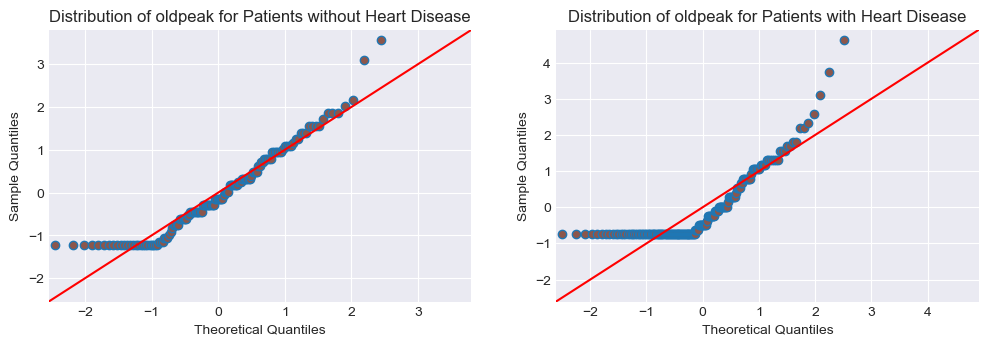

In [ ]:
# obtain only the oldpeak values of each observation
oldpeak_wo_disease = wo_disease_df["oldpeak"]
oldpeak_w_disease = w_disease_df["oldpeak"]

# create the Q-Q plot for the oldpeak distribution of patients without heart disease
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)
sm.qqplot(oldpeak_wo_disease, line='45', fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of oldpeak for Patients without Heart Disease')

# create the Q-Q plot for the oldpeak distribution of patients with heart disease
ax = fig.add_subplot(3, 2, 2)
sm.qqplot(oldpeak_w_disease,line='45',fit=True, ax=ax)
ax.get_lines()[0].set_markerfacecolor('C5')
ax.set_title('Distribution of oldpeak for Patients with Heart Disease')

After analyzing the side-by-side Q-Q plots, there seems to be strong evidence to suggest that neither patient group's `oldpeak` values resemble a Gaussian distribution. This is due to the fact that multiple data points in each graph diverge significantly from the red line. This is especially apparent among the points that fall near the value of `-1` on the y-axis and extend horizontally with a nearly flat slope instead of conforming to the pattern of a normal distribution.

In order to confirm these conclusions, we use the `shapiro` function on the `oldpeak` values of each patient group. First, we conduct the Shapiro-Wilk test on the patients without heart disease.

In [ ]:
shapiro(oldpeak_wo_disease)

ShapiroResult(statistic=0.9320630431175232, pvalue=3.3078715659939917e-06)

The calculated p-value above at approximately `0.000003`. supports that the distribution of `oldpeak` values among patients without heart disease is not normal as it falls well below the alpha value of `0.05`.

The same test is conducted in the following code using the `oldpeak` data of patients with heart disease.

In [ ]:
shapiro(oldpeak_w_disease)

ShapiroResult(statistic=0.7714805603027344, pvalue=1.0338457249580574e-14)

Like the previous test, the p-value of around `0.00000000000001` computed for `oldpeak_w_disease` also indicates a non-normal distribution, but this time for the patients with heart disease. 

Now that it has already been established that both patient groups do not conform to a Gaussian distribution, we also conduct Levene's test to assess equality of variance for both groups.

In [ ]:
levene(oldpeak_wo_disease, oldpeak_w_disease)

LeveneResult(statistic=32.43814229551921, pvalue=2.934213677350962e-08)

The p-value of around `0.00000003` produced by Levene's test supports the test's alternative hypothesis that the two patient groups have unequal variance.


Compared to the distribution of `thalach`, the distribution of `oldpeak` values is much farther from a typical normal distribution. This is evidenced by the latter's more scattered Q-Q plots and much lower p-values from the Shapiro-Wilk test. The histogram produced in Question 5 of the EDA also exhibits how the the distribution noticeably lacks the tell-tale bell curve shape that is characteristic of a Gaussian distribution. These observations hold true for both patients with heart disease and patients without heart disease. For these reasons, it is unlikely that the `oldpeak` values can be sufficiently preprocessed and made similar to a normal distribution, even with the use of normalization techniques and power transformations such as the Log Transformation, Box-Cox Transformation, and Yeo-Johnson Transformation. 

### Hypothesis Testing

After preprocessing the variables relevant to the research question, the data can now be considered viable for hypothesis testing. Each set of hypotheses will be tested separately to prove either the null hypothesis or the alternative hypothesis per variable. The type of tests to be conducted will be selected according to how each variable is distributed as well as whether they meet specific conditions or assumptions. Regardless of the tests chosen, the aim of each test will be to confirm whether a signifcant difference exists between the two unpaired samples, which are the patients without heart disease and the patients with heart disease. 

#### Maximum Heart Rate Achieved (thalach)

Since the distribution of `thalach` for both patient groups was transformed to follow a normal distribution, a T-test would be an appropriate hypothesis testing technique to use. Specifically, the independent T-test would be utilized since a patient cannot both have heart diease and not have it at the same time, making the observations independent of each other. 

The function used to perform the independent T-test is the `ttest_ind` function of the scipy library. The `thalach_w_disease_norm` series and `thalach_wo_disease_norm` series containing the normally distributed `thalach` values of the two patient groups are passed as parameters of the function. Furthermore, the `equal_var` parameter is set to True since the preprocessed `thalach` data was found to have equal variance upon conducting Levene's test. 

In [ ]:
ttest_ind(thalach_w_disease_norm, thalach_wo_disease_norm, equal_var = True)

Ttest_indResult(statistic=8.068377115958517, pvalue=1.728569614121952e-14)

The T-test's p-value of approximately `0.00000000000002` supports the first alternative hypothesis (seen below) for `thalach` and provides strong evidence that there is a difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease at a significance level of `5%`.

***$H_A$:*** *There is a difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease.*

#### ST depression induced by exercise relative to rest (oldpeak)

Given that the values for `oldpeak` are not normally distributed, the independent T-test is not a viable option for hypothesis testing as it operates on the assumption of a normal distribution. Instead. we can make use of the Mann-Whitney U Test, which functions as a non-parametric alternative to the unpaired or independent T-test. 

The assumptions that must be met in order to accurately conduct the Mann-Whitney U Test are as follows: (1) the data must be either be ordinal or continuous in nature, (2) all the observations in each group must be independent of each other, and (3) the shape of the distributions of each group must be roughly the same. 

Since the `oldpeak` values are of the floating-point data type, they clearly satisfy the first assumption. As was established before, we also know that the two patient groups are independent of each other, which meets the second assumption. Lastly, based on the histogram produced in Questions 5, we can infer that the `oldpeak` distributions of each patient group both follow a consistently decreasing pattern or shape, which satisifes the third assumption. Thus, we can conclude that the Mann-Whitney test is a suitable option for determining if there is a signficant difference in the average `oldpeak` values between each patient group.

To conduct the Mann-Whitney U Test, we can utilize scipy's `mannwhitneyu` function, passing the `oldpeak_wo_disease` series which contains the `oldpeak` values of patients without heart disease and the `oldpeak_w_disease` series which contain the `oldpeak` values of patients with heart disease.

In [ ]:
mannwhitneyu(oldpeak_wo_disease, oldpeak_w_disease)

MannwhitneyuResult(statistic=16722.5, pvalue=3.346992658271788e-13)

The resulting p-value of around `0.0000000000003` supports the alternative hypothesis (seen below) for `oldpeak`, meaning the data provides strong evidence that there is a difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease at a significance level of `5%`.

***$H_A$:*** *There is a difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease.*

## Data Modelling

As we have accomplished statistical inference, we can now move to modeling the data. In relation to our hypotheses, we are going to utilize clustering to answer our research question as well as gain important insights about our data, specifically finding patterns with regard to `thalach` and `oldpeak` in relation to `target`. Clustering will also help detect outliers that can affect our insights.

### Data Preprocessing

Before clustering the data points, we must first scale the values of each variable by performing standardization. This will allow both variables to have equal weight when clustering so that one variable does impact the calculated distance more than the other. To do this we use sklearn's function called `StandardScaler` on the `thalach` and `oldpeak` columns of `heart_df`. This produces a 2-D array which we assign to `scaled_arr`, with the 1st column of each row containing the standardized `thalach` values and the 2nd column containing the standardized `oldpeak` values. Each row of `scaled_arr` is essentially a data point representing a specific patient or observation, with `thalach` and `oldpeak` serving as the x and y values. 

In [ ]:
scaled_arr = StandardScaler().fit_transform(heart_df[["thalach", "oldpeak"]])

After scaling the values, we copy the `target` column from the `heart_df` dataframe and assign it to the new dataframe `heart_df_stand`. Then, we assign the standardized `thalach` and `oldpeak` values from `scaled_arr` to columns of the same name in the `heart_df_stand` dataframe. 

In [ ]:
heart_df_stand = heart_df[["target"]].copy()
heart_df_stand["thalach"] = scaled_arr[:, 0]
heart_df_stand["oldpeak"] = scaled_arr[:, 1]
print(heart_df_stand)

     target   thalach   oldpeak
0         0  0.806035 -0.037124
1         0  0.237495  1.773958
2         0 -1.074521  1.342748
3         0  0.499898 -0.899544
4         0 -1.905464  0.739054
..      ...       ...       ...
723       1 -1.511859  0.394086
733       1  1.112172 -0.382092
739       0  0.499898 -0.899544
843       0 -1.074521 -0.899544
878       0 -1.599327  0.307844

[302 rows x 3 columns]


As it can be observed from the two dataframes above, the values under the `thalach` and `oldpeak` columns of `heart_df_stand` are now both centered around `0`.

Now, we have already taken the necessary data from the dataset. Before starting anything however, we first look at the raw data points of each record based on their assigned `target` value. The standardized `thalach` and `oldpeak` values of patients without heart disease are stored in `wo_disease_thalach_stand` and `wo_disease_oldpeak_stand`, respectively. Likewise, the standardized `thalach` and `oldpeak` values of patients that do suffer from heart disease are assigned to `w_disease_thalach_stand` and `w_disease_oldpeak_stand`. The `plot` function is then used to graph the actual data points.

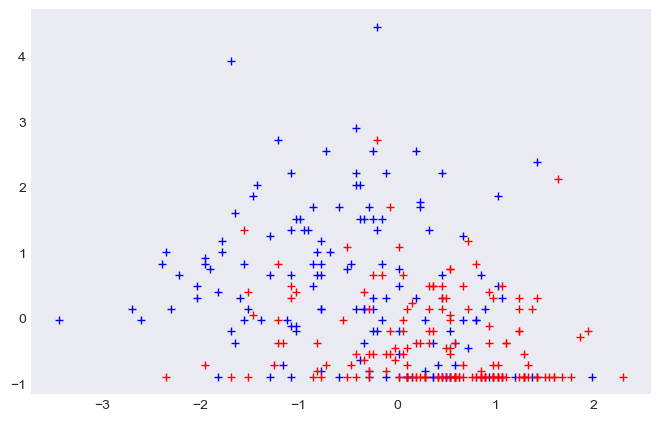

In [ ]:
fig, ax = plt.subplots( figsize=(8,5))

# get thalach and oldpeak values of patients without heart disease
wo_disease_thalach_stand = heart_df_stand.loc[heart_df_stand['target'] == 0, 'thalach']
wo_disease_oldpeak_stand = heart_df_stand.loc[heart_df_stand['target'] == 0, 'oldpeak']

# get thalach and oldpeak values of patients with heart disease
w_disease_thalach_stand = heart_df_stand.loc[heart_df_stand['target'] == 1, 'thalach']
w_disease_oldpeak_stand = heart_df_stand.loc[heart_df_stand['target'] == 1, 'oldpeak']
                                         
# create plot with data points representing each patient/observation
ax.plot(wo_disease_thalach_stand, wo_disease_oldpeak_stand, 'b+')
ax.plot(w_disease_thalach_stand, w_disease_oldpeak_stand, 'r+')

ax.grid()

# x-axis = thalach
# y-axis = oldpeak

# blue = patients without heart disease
# red = patients with heart disease

Above is a plot of the raw data that is available to us. In this case, each data point represents a record in the dataset with the x-axis representing the `thalach` variable and the y-axis representing the `oldpeak` variable. The data points have also been colored to represent if the specific record/patient had been diagnosed with heart disease. Blue data points in this case mean they are not diagnosed with heart disease while red data points patients that are diagnosed with heart disease.

### Clustering 

Since we have already scaled the values, we can now start clustering. We used sklearn's KMeans library to cluster our data points, which makes use of the k-means clustering algorithm. First, we instantiate the k-means class. The `init` parameter is set to "random" so that the inital centroid for each cluster is selected randomly. We also set the `n_clusters` parameter to `2` because the data points should only be grouped into two clusters. One cluster is supposed to represent patients with heart disease and the other is supposed torepresent patients without heart disease. Meanwhile, the `random_state` parameter of `1` simply affects how values are randomly generated when initializing the centroid.

After instantiating Kmeans, we now compute the k-means clustering algorithm for the `thalach` and `oldpeak` values stored in `scaled_arr` using the `fit` function. 

In [ ]:
#instantiate the k-means class
kmeans = KMeans(init="random", n_clusters=2, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_arr)

#view cluster assignments for each observation
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

Above is an array that represents the clusters that each record belongs to.

For easier comparison, we added the array as a column into the current dataset with the name 'cluster'

In [ ]:
heart_df_stand['cluster'] = kmeans.labels_
heart_df['cluster'] = kmeans.labels_
print(heart_df_stand)

     target   thalach   oldpeak  cluster
0         0  0.806035 -0.037124        1
1         0  0.237495  1.773958        0
2         0 -1.074521  1.342748        0
3         0  0.499898 -0.899544        1
4         0 -1.905464  0.739054        0
..      ...       ...       ...      ...
723       1 -1.511859  0.394086        0
733       1  1.112172 -0.382092        1
739       0  0.499898 -0.899544        1
843       0 -1.074521 -0.899544        1
878       0 -1.599327  0.307844        0

[302 rows x 4 columns]


To see the results of clustering better, it is plotted again in a graph. For easier comparison, the graph before clustering is also included. The graph on the left is the graph before clustering, which is grouped according to each record's `target` value, which is if the patient has actually been diagnosed with heart disease or not. For this graph, the blue points represent the patients without heart disease and the red points represent the patients with heart disease. On ther other hand, the graph on the right is the graph after clustering, which is grouped according to the resulting clusters to which they are assigned by the k-means algorithm. Here blue points represents records that have been clustered into cluster 0. Red points, on the other hand, represents records that have been clustered into cluster 1.

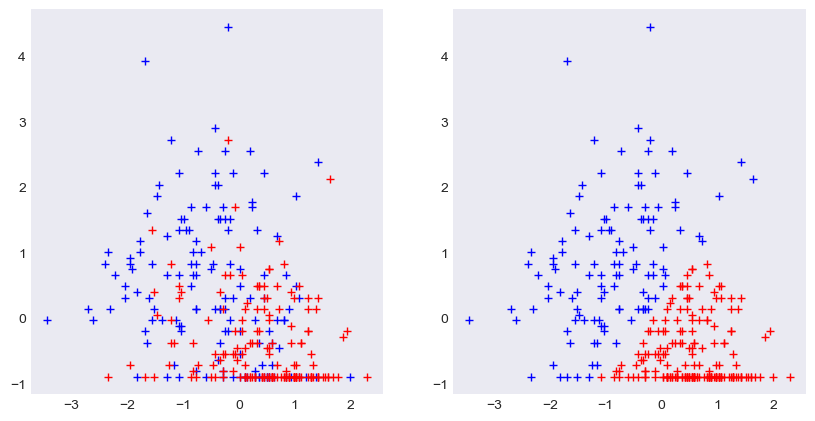

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

wo_disease_thalach_stand = heart_df_stand.loc[heart_df_stand['target'] == 0, 'thalach']
wo_disease_oldpeak_stand = heart_df_stand.loc[heart_df_stand['target'] == 0, 'oldpeak']

w_disease_thalach_stand = heart_df_stand.loc[heart_df_stand['target'] == 1, 'thalach']
w_disease_oldpeak_stand = heart_df_stand.loc[heart_df_stand['target'] == 1, 'oldpeak']
                                         
axs[0].plot(wo_disease_thalach_stand, wo_disease_oldpeak_stand, 'b+')
axs[0].plot(w_disease_thalach_stand, w_disease_oldpeak_stand, 'r+')

axs[1].plot(heart_df_stand.loc[heart_df_stand['cluster'] == 0, 'thalach'], heart_df_stand.loc[heart_df_stand['cluster'] == 0, 'oldpeak'], 'b+')
axs[1].plot(heart_df_stand.loc[heart_df_stand['cluster'] == 1, 'thalach'], heart_df_stand.loc[heart_df_stand['cluster'] == 1, 'oldpeak'], 'r+')

axs[0].grid()
axs[1].grid()

As is visible in the graph on the right-hand side, there is a clear separation in the two clusters generated by the k-means algorithm. The blue cluster clearly has lower `thalach` values and higher `oldpeak` values, while the red cluster generally has higher `thalach` values and lower `oldpeak` values. When comparing it to the plot on the left showing the grouping of data points by actual `target` value, we can conclude that the assignment of `target` and `cluster` values is completely the same, especially for the data points caught somewhere in the middle.

In [ ]:
cluster_0 = heart_df_stand.loc[heart_df_stand['cluster'] == 0]
cluster_1 = heart_df_stand.loc[heart_df_stand['cluster'] == 1]

print('Number of data points in each cluster:')

print('Cluster 0:')
print('Target 0:\t', cluster_0.loc[cluster_0['target'] == 0].shape[0])
print('Target 1:\t', cluster_0.loc[cluster_0['target'] == 1].shape[0])

print('Cluster 1:')
print('Target 0:\t', cluster_1.loc[cluster_1['target'] == 0].shape[0])
print('Target 1:\t', cluster_1.loc[cluster_1['target'] == 1].shape[0])

Number of data points in each cluster:
Cluster 0:
Target 0:	 88
Target 1:	 28
Cluster 1:
Target 0:	 50
Target 1:	 136


After clustering, we first checked each record's `target` value in their respective clusters. Cluster 0 has `88` points that have a `target` value of `0` and `28` with a `target` value of `1`. We can say that cluster 0 represents the cluster of patients who are most likely to not have heart disease. In cluster 1, `50` records have a `target` value of `0` while `136` records contain the `target` value of `1`. Cluster 1 here represents the cluster of patients who are most likely to have heart disease.

In [ ]:
total = heart_df_stand.shape[0]
correct_cluster_0 = cluster_0.loc[cluster_0['target'] == 0].shape[0]
correct_cluster_1 = cluster_1.loc[cluster_1['target'] == 1].shape[0]
accuracy = (correct_cluster_0 + correct_cluster_1) / total
accuracy

print("{:.2f}%".format(accuracy * 100))

74.17%


To calculate a rough estimate of the clustering algorithm's accuracy with regard to the two features used, each respective cluster's `target` values are compared to the original dataset. In this case, in cluster 0, the number of correctly clustered records are the number of records with the `target` value of `0`. In cluster 1, the number of correctly clustered records are the number of records with the `target` value of `1`. With the number of correct records, we simply add them together and divide the sum by the total amount of records in the dataset. With these values, we come out with 74.17% accuracy compared to the actual dataset. In other words, approximately `74.17%` of patients in the given dataset were correctly clustered or classified by the k-means algorithm using the `thalach` and `oldpeak` features as either having or lacking the presence of heart disease. 

Now, we simply take a look at the characteristics of the two clusters produced by the k-means algorithm by generating numerical summaries. 

In the code block below, the `groupby` function is used to group the observations in `heart_df` according to their assigned cluster and the `agg` function is used to get the mean, median, standard deviation, and count of the `thalach` variable per cluster.

In [ ]:
heart_df.groupby("cluster").agg({"thalach": ["mean", "median", "std", "count"]})

thalach                       
               mean median       std count
cluster                                   
0        129.120690  129.5  19.54044   116
1        162.322581  162.0  13.79946   186

We can observe from the table above that both the mean and median values for `cluster` value `1` are noticeably higher than that of `cluster` value `0`. This indicates that higher `thalach` values can somewhat be associated with a higher likelihood of heart disease.

Here, we also obtain the numerical summaries for `oldpeak` using the `groupby` and `agg` functions once again.

In [ ]:
heart_df.groupby("cluster").agg({"oldpeak": ["mean", "median", "std", "count"]})

oldpeak                      
             mean median       std  len
cluster                                
0        2.051724   1.95  1.170023  116
1        0.413978   0.05  0.554995  186

In this case, it seems that `cluster` value `1` has lower `oldpeak` values on average compared to `cluster` value `0`. This could be interpreted as very low `oldpeak` values having some association with a higher risk of heart disease. 

After analyzing the numerical summaries, we can also produce visualizations of the distributions of each cluster via boxplots. 

The code below uses the `boxplot` function on the `heart_df` dataframe to plot the distribution of `thalach` values per `cluster`.

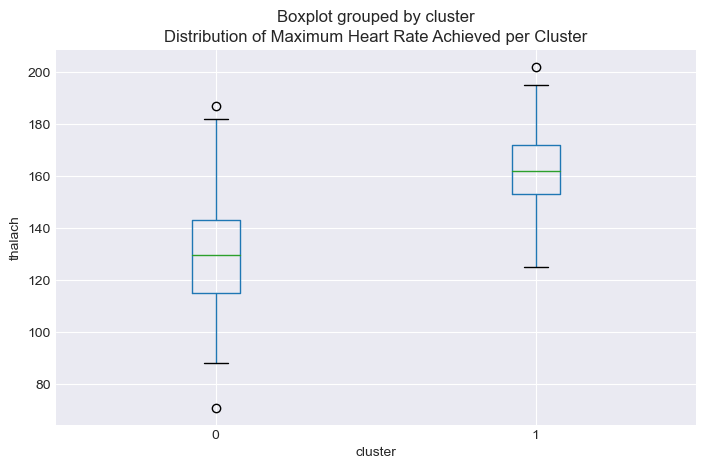

In [ ]:
heart_df.boxplot("thalach", by="cluster", figsize=(8,5))
plt.title("Distribution of Maximum Heart Rate Achieved per Cluster")
plt.xlabel("cluster")
plt.ylabel("thalach")
plt.show()

With the boxplot above, it can possibly be inferred that if a patient is to have a maximum heart rate lower than `140` beats per minute, they are less likely to have heart disease. At the same time, if a patient is to have a maximum heart rate higher `150` beats per minute, they are more likely to have heart disease. It is important to note that both boxplots have records that counter the previous arguments due to their whiskers intersecting.

After visualizing the `thalach` distribution, we can do the same with `oldpeak`. Again, the `boxplot`function is used on `heart_df`, but this time to visualize the distribution of `oldpeak` by `cluster`.

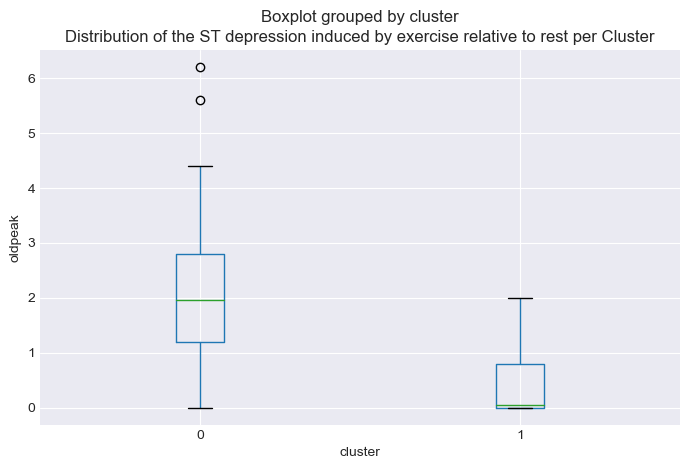

In [ ]:
heart_df.boxplot("oldpeak", by="cluster", figsize=(8,5))
plt.title("Distribution of the ST depression induced by exercise relative to rest per Cluster")
plt.xlabel("cluster")
plt.ylabel("oldpeak")
plt.show()

With the boxplot above, it may be possible to infer that if a patient is to have a ST depression value higher than `1`, they are less likely to have heart disease. At the same time, if a patient is to have a ST depression value closer to `0`, they are more likely to have heart disease. It is important to note that both boxplots have records that counter the previous arguments due to their whiskers intersecting.

### Summary of Insights

Having done both statistical inference and data modelling to help answer the research question, we can now summarize the insights gleaned from both as we begin to reach a conclusion.

#### Statistical Analysis

To summarize our processes and insights briefly, we first defined our hypotheses to become our point of reference throughout the study.

##### Maximum Heart Rate Achieved (thalach)
***$H_0$:*** *There is no difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease.*

***$H_A$:*** *There is a difference in the average maximum heart rate achieved between patients without heart disease and patients with heart disease.*

#####  ST depression induced by exercise relative to rest (oldpeak)
***$H_0$:*** *There is no difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease.*

***$H_A$:*** *There is a difference in the average ST depression induced by exercise relative to rest between patients without heart disease and patients with heart disease.*


With these hypotheses defined, we first had to identify if our data followed a normal distribution. This was done by creating Q-Q plot with the use of functions `figure`, `add_subplot`, and `qqplot`.

#### Data Preprocessing

##### Maximum Heart Rate Achieved (thalach)

First, we visualized the data for `thalach` in relation to whether the patient has a disease or not. We were able to conclude that the Distribution of thalach for Patients without Heart Disease follows a Gaussian distribution. However, the distribution of thalach for Patients with Heart Disease does not follow this behavior.

To further confirm this conclusion of non-normal distribution, we employed the use of the Shapiro-Wilk Test to compute the p-values of the data frame of thalach without disease. This was done with the use of the `shapiro` function from the scipy library. This resulted in an estimated p-value of `0.0005`, which is lower than the earlier stated `0.05` alpha value. Following the Shapiro-Wilk Test, this value supports the Shapiro-Wilk test's alternative hypothesis and indicates a non-normal distribution.

Alongside the Shapiro-Wilk Test, we also utilized Levene’s test to determine whether the variance of the two patient groups is relatively equal. With the use of the `levene` function from the scipy library, this results in an estimated p-value of `0.02` which indicates that there is an unequal variance between the two groups.

Now that we have confirmed its non-normal distribution and unequal variance, we will attempt to transform the data to achieve normal distribution. This is done by applying Box-Cox Transformation to the `thalach` column with the use of the `boxcox` function from the scipy library. After undergoing changes and retesting with `Shapiro()` and `levene()`, we were able to transform the data to result in estimated p-values of `0.30` and `0.49` respectively. These values signify that the data related to thalach and those without disease now more closely resembles a normal distribution and results in equal variance.

#####  ST depression induced by exercise relative to rest (oldpeak)

Following the same pattern and applying this to `oldpeak`, we were able to visualize the data and determine that for both distributions of patients with and without heart disease in relation to `oldpeak`, neither data resembles a Gaussian distribution. 

As both data distributions follow this behavior, we applied the `shapiro()` function onto both and were given an estimated p-value of `0.000003` and `0.00000000000001` for those without disease and with disease respectively. This further confirms that both distributions do not follow the Gaussian distribution and are non-normal.

Supported by the results of the `levene()` function, an estimated p-value of `0.00000003` confirms that the data of both patient groups have unequal variance.

Due to the large disparity between this distribution to that of the Gaussian distribution, we decided that normalization would be unlikely and a better course of action would be to use a non-parametric test instead. 

#### Hypothesis Testing

##### Maximum Heart Rate Achieved (thalach)

As we transformed our data to follow a normal distribution, we tested our first set of hypotheses with the independent t-test. With the use of the `ttest_ind` function from the scipy library, we were able to get an estimated p-value of `0.00000000000002` which supports our first alternative hypothesis. This suggests strong evidence of a difference in the average maximum heart rate achieved between patients without heart disease and those with heart disease. This follows the significance level of `5%`.

#####  ST depression induced by exercise relative to rest (oldpeak)

However, for the case of `oldpeak`, we cannot use the independent t-test as the data is not normally distributed. As such, we used the Mann-Whitney U Test which can be used on data that is not normally distributed. Additionally, considering that the 3 aforementioned assumptions are met by our data, this test can be utilized to test our hypotheses. The `mannwhitneyu` function from the scipy library was used to perform this test. As a result, an estimated p-value of `0.0000000000003` was produced. This supports the alternative hypothesis of a difference in the average ST depression induced by exercise relative to rest between patients without disease and patients with the disease. Again, this also follows the significance level of `5%`.

#### Clustering

Moving forward, we employed the use of a scatter plot to gain important insights about the structure of the data points, specifically finding patterns to `thalach` and ` oldpeak` in relation to `target`. Before proceeding to cluster, we standardized the values using the `StandardScaler()` function from the sklearn library. With all the values having equal weight, we were able to proceed with K-means clustering. 

Following the K-means algorithm, we instantiated the kmeans class with the `KMeans` function from the sklearn library. With the list of data points inserted, the `fit` function grouped them into clusters, specifically 2 clusters as specified by our designated k-value.

`Cluster 0` contains `88 data points` that fall under `Target 0` and `28 data points` that fall under `Target 1`, describing `cluster 0` as more likely to represent patients without heart disease. On the other hand, `cluster 1` contains `50 data points` that fall under `Target 0` and `136 data points` that fall under `Target 1`, describing `Cluster 1` as more likely to represent patients with heart disease. These results give us an accuracy of `74.17%` compared to the original dataset.

Proceeding with the boxplot representation of each variable per cluster, we can make inferences on the likelihood of a patient having heart disease.

It was found that patients with a `maximum heart rate lower than 140 beats per minute` or an `ST depression value higher than 1` are `somewhat less likely to have heart disease`. Patients with a `maximum heart rate higher than 150 beats per minute` or an `ST depression value close to 0` are `somewhat more likely to have heart disease.` 

### Conclusion

Ultimately, based on the results of EDA and further hypothesis testing using the given dataset which produced p-values of `0.00000000000002` and `0.0000000000003`for the `thalach` and `oldpeak`variables respectively,  there is indeed a statistically significant difference in the the average maximum heart rate and ST depression values between patients with and without heart disease at a `95%` confidence level. As such, it is also plausible to conclude that **the difference in the distribution of `thalach` and `oldpeak` can be leveraged to cluster and determine whether a patient is suffering from heart disease**. However, it should be noted that clustering with these two features is not completely accurate, and is therefore still subject to error or misclassification. There is certainly still room for improvement in creating a more reliable clustering algorithm, such as by incorporating other features or perhaps by utilizing a larger dataset. Nevertheless, employing these two variables still proves to be a relatively effective method for clustering patients according to the presence of heart disease, at least compared to some of the other numeric variables included in this dataset. 

## References

Ascot Cardiology Group (n.d.). *Diagnostic resting ECG*. https://ascotcardiologygroup.co.nz/services/diagnostic-resting-ecg/#:~:text=A%20Diagnostic%20Resting%20ECG%20(electrocardiogram,of%20a%20previous%20heart%20attack

Carlén, A., Gustafsson, M., Åström Aneq, M., & Nylander, E. (2019). Exercise-induced ST depression in an asymptomatic population without coronary artery disease. *Scandinavian Cardiovascular Journal, 53*(4), 206-212. https://www.tandfonline.com/doi/full/10.1080/14017431.2019.1626021

Centers for Disease Control and Prevention. (2022, April 29). *What is Thalassemia?* https://www.cdc.gov/ncbddd/thalassemia/facts.html

Cleveland Clinic. (n.d.). *Fasting blood sugar test*. https://my.clevelandclinic.org/health/diagnostics/21952-fasting-blood-sugar

Cleveland Clinic. (n.d.). *Fluoroscopy*. https://my.clevelandclinic.org/health/diagnostics/21992-fluoroscopy

Cleveland Clinic. (n.d.). *Noncardiac chest pain*. https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain

Harvard Health Publishing. (2021, September 21). *Angina: Symptoms, diagnosis and treatments*. https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments

Lapp, D. (2019). Heart disease dataset. Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

Mayo Clinic. (2022, March 18). *Blood pressure chart: What your reading means*. https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982

Roland, J. (2017, January 30). *What is serum cholesterol and why is it important? Healthline*. https://www.healthline.com/health/serum-cholesterol#testing-cholesterol

Tumolo, J. (2015, February 19). *Typical and atypical angina: What to look for. UMass Memorial Health Harrington.* https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/

UCI Machine Learning Repository. (n.d). Heart disease data set. 
https://archive.ics.uci.edu/ml/datasets/heart+Disease
